# **Mini Project on Machine Learning Algorithms**

## Topic: Molecular Classification of Cancer by Gene Expression Monitoring using various classification algorithms


*Submitted By:*

```markdown
      Name         |    Roll No. 
-------------------|------------------
Ajinkya Mahure     |      238 
Tejas Thawari      |      207
Aniket Sharma      |      192
Himanshu Shimpi    |      189

```

# **Application of Machine Leaning in Bio-Informatics**

Bioinformatics is a field of study that uses computation to extract knowledge from biological data. It includes the collection, storage, retrieval, manipulation and modeling of data for analysis, visualization or prediction through the development of algorithms and software.

We can quote it in a simpler way **“Bioinformatics deals with computational and mathematical approaches for understanding and processing biological data”**.

### **Molecular Classification of Cancer by Gene Expression Monitoring using various classification algorithms**
Although cancer classification has improved over the past 30 years, there has been no general approach for identifying new cancer classes (class discovery) or for assigning tumors to known classes (class prediction). The dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes.

The goal is to classify patients with Acute Myeloid Leukemia (AML) and Acute Lymphoblastic Leukemia (ALL) using various classifiction algorithms.

In [183]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#Loading the Datasets
Train_Data = pd.read_csv("https://raw.githubusercontent.com/Ajinkya626/Datasets/main/data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("https://raw.githubusercontent.com/Ajinkya626/Datasets/main/data_set_ALL_AML_independent.csv")
labels = pd.read_csv("https://raw.githubusercontent.com/Ajinkya626/Datasets/main/actual.csv", index_col = 'patient')
Train_Data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [185]:
Train_Data.describe()
Train_Data.shape

(7129, 78)

In [186]:
Test_Data.head()
Test_Data.shape

(7129, 70)

### **About the dataset:**

Each row represents a different gene.Columns 1 and 2 are descriptions about that gene.
Each numbered column is a patient in label data.
Each patient has 7129 gene expression values — i.e each patient has one value for each gene.
The training data contain gene expression values for patients 1 through 38.
The test data contain gene expression values for patients 39 through 72

In [187]:
#Check if there are any nulls in dataset(There are no nulls in our dataset)
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [188]:
#Deleting column call in both the dataset as it does not have any statistical referenece
cols = [col for col in Test_Data.columns if 'call' in col]
test = Test_Data.drop(cols, 1)
cols = [col for col in Train_Data.columns if 'call' in col]
train = Train_Data.drop(cols, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [189]:
#Join All datasets and transform them
patients = [str(i) for i in range(1, 73, 1)]
df_All = pd.concat([train, test], axis = 1)[patients]
df_all = df_All.T

In [190]:
#After transpose, the rows have been converted to columns(7129 columns/features)
#Now convert patient column to a numeric value and create dummy variables
#(converts categories into numeric values) 
#since ‘cancer’ is a cateogorical column having 2 categories(ALL, AML).
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)

In [191]:
#Now join data frames df_all and labels on patient column.
Data = pd.merge(df_all, labels, on="patient")
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


## **Data Visualisation**

In [192]:
Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

Cancer Classification


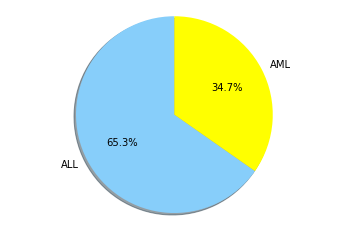

In [193]:
labels ='ALL', 'AML'
sizes = [47, 25]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print('Cancer Classification')
plt.show()


0 refers to ALL and 1 refers to AML


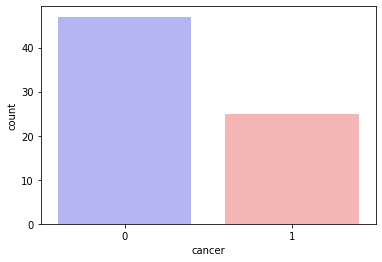

In [194]:
sns.countplot(x='cancer',data=Data,palette='bwr')
print('0 refers to ALL and 1 refers to AML')

## **Data PreProcessing**

In [195]:
#Our next step is to create two variables 
#X(matrix of independent variables) and y(vector of the dependent variable).

X, y = Data.drop(columns=["cancer"]), Data["cancer"]

In [196]:
#Next, We split 65% of the data into training set while 35% of the data to test set. 
#The test_size variable is where we actually specify the proportion of the test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.35, random_state= 0)

In [197]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## **Dimensionality Reduction**

The number of columns/features that we have been working with is huge. We have 72 rows and 7129 columns. Basically we need to decrease the number of features(Dimensioanlity Reduction) to remove the possibility of Curse of Dimensionality.

For reducing the number of dimensions/features we will use the most popular dimensionality reduction algorithm i.e. PCA(Principal Component Analysis).

To perform PCA we have to choose the number of features/dimensions that we want in our data.

In [198]:
from sklearn.tree import DecisionTreeClassifier
classifier11 = DecisionTreeClassifier()
classifier11 = classifier11.fit(X_train,y_train)

#prediction
y_pred = classifier11.predict(X_test)#Accuracy
from sklearn import metrics

accdt = accuracy_score(y_test, y_pred)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8461538461538461


In [199]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1


print("k = ",k)

k =  33


Text(0.5, 1.0, 'Around 90% of variance is explained by the First 33 columns ')

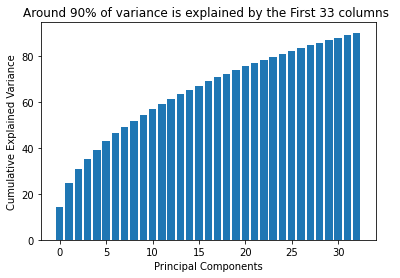

In [200]:
#The above code gives k=33.
#Now let us take k=33 and apply PCA on our independent variables.

from sklearn.decomposition import PCA
pca = PCA(n_components = 33)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(33), cum_sum)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.title("Around 90% of variance is explained by the First 33 columns ")

## **Using SVM**
The next step is to fit our data into the Support Vector Machine(SVM) algorithm but before doing that we will perform Hyperparameter optimization.

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned.

We will use GridSearchCV from sklearn for choosing the best hyperparameters.

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=1)

In [202]:
#Checking the best parameter combination
best_parameters = search.best_estimator_
print(best_parameters)

SVC(C=1, kernel='linear')


In [203]:
#Now let's train our SVM classification model.
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [204]:
#Its time for some predictions:
y_pred=model.predict(X_test)

In [205]:
#Evaluating model performance:

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
accsvm = accuracy_score(y_test, y_pred)
print('Accuracy Score:',round(accuracy_score(y_test, y_pred),2))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy Score: 0.69


Text(0.5, 257.44, 'Predicted label')

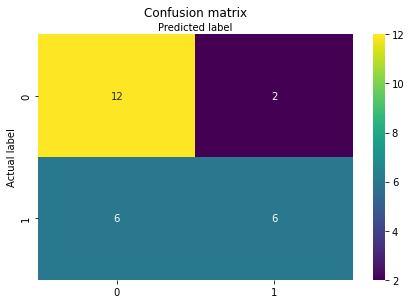

In [206]:
#Confusion matrix and visualize it using Heatmap.

class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
class_names=['ALL', 'AML']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [207]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.75      0.50      0.60        12

    accuracy                           0.69        26
   macro avg       0.71      0.68      0.68        26
weighted avg       0.71      0.69      0.68        26



## **Using Decision Trees**

Now we'll try fitting our data in Decision Trees algorithm to predict and classify and then compare the results.

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [208]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1 = classifier1.fit(X_train,y_train)

In [209]:
#prediction
y_pred = classifier1.predict(X_test)#Accuracy
from sklearn import metrics

accdt = accuracy_score(y_test, y_pred)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.5384615384615384


Feature: 0, Score: 0.15250
Feature: 1, Score: 0.28823
Feature: 2, Score: 0.45562
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.10365
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000


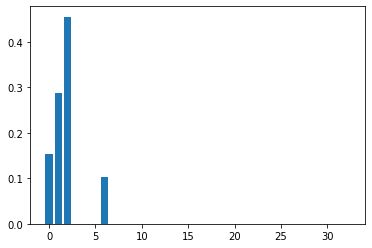

In [210]:
from matplotlib import pyplot
importance = classifier1.feature_importances_
#Feature Importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



In [211]:
Xtrain = X_train[:,[1,2,9,12,29]]
#print(Xtrain)
Xtest = X_test[:,[1,2,9,12,29]]
#print(Xtest)

In [212]:
classifier2 = DecisionTreeClassifier()
classifier2 = classifier2.fit(Xtrain,y_train)
y_pred2 = classifier2.predict(Xtest)#Accuracy

accdt2 = accuracy_score(y_test, y_pred2)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred2))

Accuracy Score: 0.6923076923076923


[[11  3]
 [ 9  3]]


Text(0.5, 257.44, 'Predicted label')

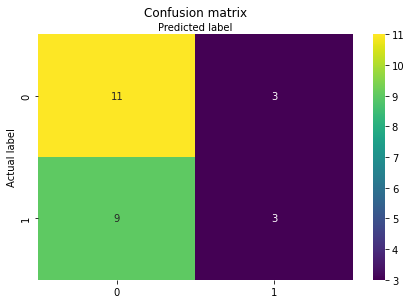

In [213]:
#Confusion matrix and visualize it using Heatmap.

class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
class_names=['ALL', 'AML']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

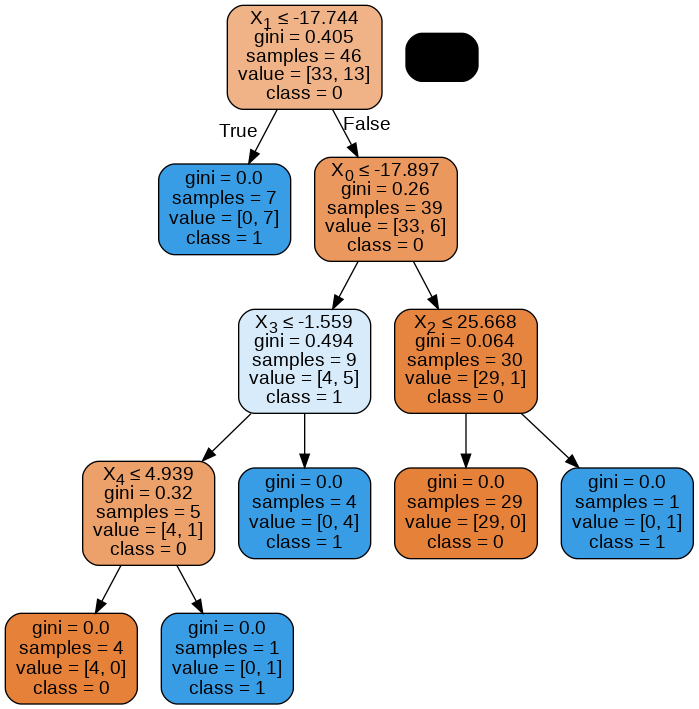

In [214]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [215]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65        14
           1       0.50      0.25      0.33        12

    accuracy                           0.54        26
   macro avg       0.53      0.52      0.49        26
weighted avg       0.53      0.54      0.50        26



## **Using Random Forest Classifier**

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. 

Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

In [231]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accrfc = accuracy_score(y_test, y_pred)

In [232]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5769230769230769


[[14  0]
 [11  1]]


Text(0.5, 257.44, 'Predicted label')

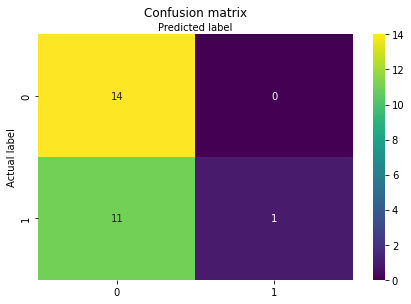

In [218]:
#Confusion matrix and visualize it using Heatmap.

class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
class_names=['ALL', 'AML']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [219]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        14
           1       1.00      0.08      0.15        12

    accuracy                           0.58        26
   macro avg       0.78      0.54      0.44        26
weighted avg       0.76      0.58      0.46        26



## **Using Gradient Boosting**

Boosting:The principle behind boosting algorithms is first we built a model on the training dataset, then a second model is built to rectify the errors present in the first model.

The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. This is done by building a new model on the errors or residuals of the previous model.

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test)

accgb = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5384615384615384


[[10  4]
 [ 8  4]]


Text(0.5, 257.44, 'Predicted label')

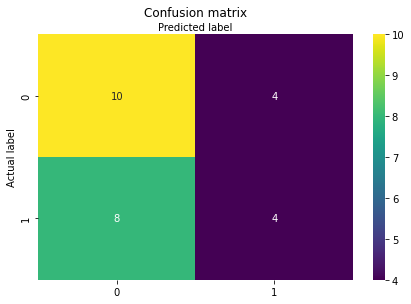

In [221]:
#Confusion matrix and visualize it using Heatmap.

class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
class_names=['ALL', 'AML']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [222]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.50      0.33      0.40        12

    accuracy                           0.54        26
   macro avg       0.53      0.52      0.51        26
weighted avg       0.53      0.54      0.52        26



## **Using KNN Algorithm**
K-nearest neighbors (KNN) is a type of supervised learning machine learning algorithm and is used for both regression and classification tasks. 

KNN is used to make predictions on the test data set based on the characteristics of the current training data points. This is done by calculating the distance between the test data and training data, assuming that similar things exist within close proximity. 

The algorithm will have stored learned data, making it more effective at predicting and categorising new data points. When a new data point is inputted, the KNN algorithm will learn its characteristics/features. It will then place the new data point at closer proximity to the current training data points that share the same characteristics or features.

In [223]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accknn = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5384615384615384


[[14  0]
 [12  0]]


Text(0.5, 257.44, 'Predicted label')

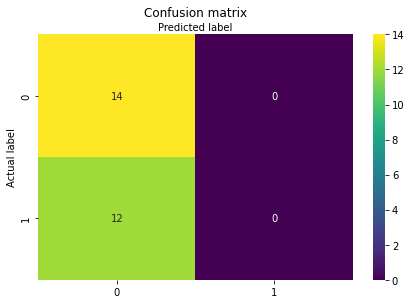

In [224]:
#Confusion matrix and visualize it using Heatmap.

class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
class_names=['ALL', 'AML']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [225]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        14
           1       0.00      0.00      0.00        12

    accuracy                           0.54        26
   macro avg       0.27      0.50      0.35        26
weighted avg       0.29      0.54      0.38        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Comparing the Algorithms based on their Accuracies**
After implementing these various algorithms on our dataset, we're comparing the accuracies of each dataset and then deciding the best algorithm model for our dataset classification.

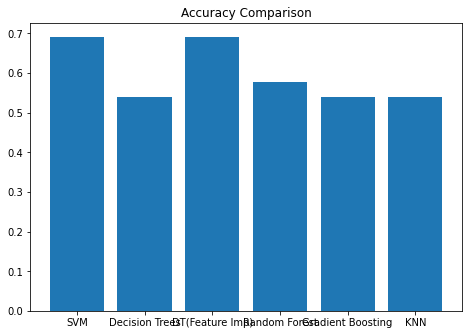

In [226]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algs = ['SVM', 'Decision Trees','DT(Feature Imp)', 'Random Forest', 'Gradient Boosting', 'KNN']
accuracy_scores = [accsvm,accdt,accdt2,accrfc,accgb,accknn]
ax.bar(algs,accuracy_scores)
ax.set_title('Accuracy Comparison')
plt.show()